# Understanding flight delays ✈️

## 📖 Background

You work for a major airline operating flights across the USA. Flight delays are a
significant challenge for both the airline and passengers, causing disruptions, financial
losses, and dissatisfaction. As part of the airline’s data analytics team, your goal is to analyze historical flight data to uncover delay patterns, identify operational inefficiencies, and predict delays before they occur. By identifying delay patterns, predicting delays, and uncovering
the factors that contribute most to delays, you’ll be able to drive operational efficiency
and enhance the overall passenger experience. Your insights will help the airline make data-driven decisions to optimize scheduling, improve on-time performance, and enhance passenger satisfaction. 

Can you crack the code behind flight delays and revolutionize air travel? 



## 💾 The data

#### Your team provided you with 2 files with the following information ([source](https://www.kaggle.com/datasets/mahoora00135/flights/data)):

**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number 
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code 
- `Airline Name` - Airline Name 


In [1]:
import pandas as pd
flight_data = pd.read_csv('data/flights.csv')
airlines_codes = pd.read_csv('data/airlines_carrier_codes.csv')
flight_data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


In [2]:
airlines_codes.head() 

,Carrier Code,Airline Name
0,UA,United Airlines Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.


## 💪 Challenge

Create a report summarizing your insights. Your report should explore the following questions:

1. How do different airlines compare in terms of their departure and arrival times? Are there noticeable trends in their on-time performance over the year? A well-structured visualization could help uncover patterns.
2. Are there particular months/weeks/time of day where there is a general trend of greater delays in flights across all carriers? If so, what could be the reasons? 
3. Some airports seem to operate like clockwork, while others are notorious for disruptions. How do different airports compare when it comes to departure and arrival punctuality? Could location, traffic volume, or other factors play a role? Are there patterns that emerge when looking at delays across various airports?  
4. [Optional 1] Predict whether a flight will have a delay of 15 minutes or more at departure.
5. [Optional 2] What underlying factors influence flight delays the most? Are some routes more prone to disruptions than others? Do external variables like time of day, distance, or carrier policies play a significant role? By analyzing the relationships between different features, you might discover unexpected insights.

## 🧑‍⚖️ Judging criteria: your vote, your winners!

This is a community-driven competition, your votes decide the winners! Once the competition ends, you'll get to explore submissions, celebrate the best insights, and vote for your favorites. The top 5 most upvoted entries will win exclusive DataCamp merchandise - so bring your A-game, impress your peers, and claim your spot at the top! 



## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# Data Understanding and Reading

In [3]:
import pandas as pd
flight_data = pd.read_csv('data/flights.csv')
airlines_codes = pd.read_csv('data/airlines_carrier_codes.csv')
flight_data = flight_data.set_index('id')
# Data Understanding and Reading
flight_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
id,,,,,,,,,,,,,,,,,,
0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2023,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55
336772,2023,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0
336773,2023,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10


In [4]:
flight_data.iloc[:, 1:].describe()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [5]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

In [6]:
flight_data['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [7]:
flight_data['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

# Handling Missing Values


In [8]:
# Calculate number of missing values in each column
flight_data.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
dtype: int64

## Missing Value Problem Description
There are six columns has missing values, each column has different number of missing values except two columns `arr_delay` and `air_time`.

### Columns can be handled: 
- `dep_delay`
- `arr_time`
- `arr_delay`
- `air_time`

### Columns can't be handled:
- `tail_num`

Anyway, Columns which can't be handled is not important for now for this analysis so it won't be barrier.

In [9]:
def flight_status(df):
    conditions_cancelled = df['dep_time'].isna() & df['air_time'].isna() & df['arr_time'].isna() & df['arr_delay'].isna() & df['dep_delay'].isna()
    
    conditions_Missing_Value = (
        (df['dep_time'].notna() & df['air_time'].notna() & df['arr_time'].isna()) |
        (df['dep_time'].notna() & df['air_time'].isna() & df['arr_time'].notna()) |
        (df['dep_time'].isna() & df['air_time'].notna() & df['arr_time'].notna()) 
    )
    conditions_Unreported = df['dep_time'].notna() & df['air_time'].isna() & df['arr_time'].isna()
    
    df['status'] = 'Safe'  
    
    df.loc[conditions_cancelled, 'status'] = 'Cancelled' # Cancelled Travils
    df.loc[conditions_Missing_Value, 'status'] = 'Missing Value' # can be calculated
    df.loc[conditions_Unreported, 'status'] = 'Un-Reported'
    return df

flight_status_DF = flight_status(flight_data)

In [10]:
import plotly.express as px

# Count how many flights for each status
status_counts = flight_status_DF['status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']

# Modern color palette
modern_colors = ['#b71cff', '#12fff1', '#ff1212', '#EF553B', '#FFA15A']  # blue, purple, teal, orange, red

# Create pie chart
fig = px.pie(
    status_counts,
    names='status',
    values='count',
    title='Flight Status Distribution',
    color_discrete_sequence=modern_colors
)
fig.update_layout(
    showlegend=True,
    width=800,   # Increase width
    height=800   # Increase height
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)
fig.show()
print(status_counts)

          status   count
0           Safe  327346
1      Cancelled    8255
2  Missing Value     717
3    Un-Reported     458


In [11]:
flight_status_DF[(flight_status_DF['status'] =='Missing Value') & (flight_status_DF['arr_time'].isna())]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,status
id,,,,,,,,,,,,,,,,,,,


## Discussion

We have missing values in several columns, with the count varying from one column to another.  
The columns with the highest number of missing values are `arr_delay` and `air_time`, each with **9,430** missing entries.

In some cases, missing values can be recovered if we have values from at least two of the following columns: `dep_time`, `air_time`, and `arr_time`.  
Using basic time relationships, we can calculate the third value if any two are known.

To better understand and handle missing data, we introduce a new column representing the **status** of each flight:

- **Safe**: The flight was completed and all critical information is available.
- **Cancelled**: Indicates the flight was cancelled — no departure or arrival data is present.
- **Un-Reported**: `dep_time` exists, but `arr_time` and `air_time` are missing.  
  This could suggest unusual events, such as a crash, emergency landing, or possibly a private/untracked flight.

For now, we focus on solving the problem of **predicting missing values** for records marked as "Missing Value" in the status column.


In [12]:
EWR_to_IAH = flight_status_DF[(flight_status_DF['origin'] == 'EWR') & (flight_status_DF['dest'] == 'IAH')]
columns_to_select = ['origin', 'dest', 'dep_time', 'arr_time', 'dep_delay', 'arr_delay', 'air_time']
EWR_to_IAH_filtered = EWR_to_IAH.loc[:, EWR_to_IAH.columns.isin(columns_to_select)]
EWR_to_IAH_filtered

,dep_time,dep_delay,arr_time,arr_delay,origin,dest,air_time
id,,,,,,,
0,517.0,2.0,830.0,11.0,EWR,IAH,227.0
89,739.0,0.0,1104.0,26.0,EWR,IAH,249.0
177,908.0,0.0,1228.0,9.0,EWR,IAH,233.0
247,1044.0,-1.0,1352.0,1.0,EWR,IAH,229.0
311,1205.0,5.0,1503.0,-2.0,EWR,IAH,221.0
...,...,...,...,...,...,...,...
336406,1551.0,30.0,1825.0,18.0,EWR,IAH,190.0
336448,1623.0,-6.0,1852.0,-27.0,EWR,IAH,177.0
336524,1729.0,9.0,2001.0,-9.0,EWR,IAH,173.0


## Analysis of air_time vs. Time Difference from dep_time and arr_time
In this dataset, we might expect the difference between arr_time (arrival time) and dep_time (departure time) to approximate the air_time (the duration the aircraft is airborne). However, this assumption does not always hold true due to various operational and data-related factors.

### Example 1: EWR to IAH
- Departure Time: 5:17 AM → (5 × 60) + 17 = 317 minutes
  
- Arrival Time: 8:30 AM → (8 × 60) + 30 = 510 minutes
  
- Time Difference: 510 − 317 = 193 minutes
  
- Recorded air_time: 227 minutes
  
- Discrepancy: 193 − 227 = −34 minutes

Here, the recorded air_time is 34 minutes longer than the calculated time difference, which is physically implausible if the arrival and departure times are in the same time zone. This suggests a potential time zone difference or data inconsistency.

### Example 2: LGA to ATL
- Departure Time: 5:54 AM → (5 × 60) + 54 = 354 minutes
  
- Arrival Time: 8:12 AM → (8 × 60) + 12 = 492 minutes
  
- Time Difference: 492 − 354 = 138 minutes
  
- Recorded air_time: 116 minutes
  
- Discrepancy: 138 − 116 = 22 minutes

In this case, the air_time is 22 minutes shorter than the difference between arr_time and dep_time. This is more realistic and likely reflects non-airborne time such as taxiing, delays at the gate, or waiting for clearance to disembark.

### Interpretation
The discrepancy in the EWR–IAH flight likely results from time zone differences not accounted for in the calculation. Flights crossing time zones need proper adjustment to compare arr_time and dep_time meaningfully.

For the LGA–ATL flight, the shorter air_time is consistent with ground operations (e.g., taxiing after landing), which are included in the total trip time but not in air_time.

### Conclusion
While arr_time − dep_time offers a rough estimate of total travel time, air_time more accurately represents the duration the plane was in the air. Discrepancies between these values can reveal operational factors like taxiing or time zone shifts and should be accounted for during analysis.

## Fixing Time Zone Problem

In [13]:
def hhmm_converter(Num):
    if pd.isna(Num):
        return None
    num = Num / 100
    hours = int(num)
    minutes = Num - (hours * 100)
    return (hours * 60) + minutes

def Extra_Time_Col(DF):
    extra_times = []

    for i in range(len(DF)):
        row = DF.iloc[i]
        dep = hhmm_converter(row['dep_time'])
        arr = hhmm_converter(row['arr_time'])
        air = row['air_time']

        if dep is not None and arr is not None and pd.notna(air):
            diff = arr - dep
            if diff < 0:  # overnight flight
                diff += 24 * 60
            extra_time = diff - air
        else:
            extra_time = None

        extra_times.append(extra_time)

    DF['extra_time'] = extra_times
    return DF
flight_status_DF = Extra_Time_Col(flight_status_DF)

flight_status_DF

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,status,extra_time
id,,,,,,,,,,,,,,,,,,,,
0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Safe,-34.0
1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Safe,-30.0
2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Safe,61.0
3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Safe,77.0
4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Safe,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2023,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,Cancelled,NaN
336772,2023,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,Cancelled,NaN
336773,2023,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,Cancelled,NaN


## Step 1: Identify Records with 'Missing Value' Status

At first, we tried to calculate missing values in the `air_time` column by subtracting `dep_time` from `arr_time`.  
However, when testing this method on a sample, we noticed that the computed difference didn't always match the actual `air_time` — sometimes it was smaller, sometimes larger.

Initially, this seemed physically impossible. But then we realized the key factor: **time zones**.  
Flights may cross time zones between origin and destination, which affects the recorded departure and arrival times.  
As a result, calculating `air_time` as a simple time difference can be misleading unless time zone offsets are accounted for.

So, it's time to adjust our strategy and treat this as a machine learning problem instead of a direct calculation.


## Collecting Time Zone Data

Some values in the `extra_time` column came out negative, which signals a problem with inconsistent or missing time zone adjustments between departure and arrival locations.

To resolve this, we collected accurate time zone offset data using web scraping from [TravelMath](https://www.travelmath.com/time-change/from/).  
This additional data allows us to normalize flight times correctly and ensure that calculations like `extra_time` are meaningful and realistic.

The web scraping implementation is shown in the following code.


In [14]:
import pandas as pd
time_zones = pd.read_csv('data/TimeZones.csv')
# Fix a Problem in Data
time_zones.loc[(time_zones['dest'] == 'ROC'), 'TimeZoneMinutes'] = 0
time_zones.loc[(time_zones['dest'] == 'ROC'), 'TimeZoneDifference'] = 'the same time'
time_zones

,Unnamed: 0,origin,dest,TimeZoneDifference,TimeZoneMinutes
0,0,EWR,IAH,1 hour behind,60
1,1,EWR,MIA,the same time,0
2,2,EWR,BQN,the same time,0
3,3,EWR,ATL,the same time,0
4,4,EWR,ORD,1 hour behind,60
...,...,...,...,...,...
309,309,JFK,LEX,the same time,0
310,310,JFK,CHO,the same time,0
311,311,JFK,TVC,the same time,0
312,312,JFK,ANC,4 hours behind,240


In [15]:
# timezone_map = time_zones.set_index(['origin', 'dest'])['TimeZoneMinutes'].to_dict()
# Define a function to look up the timezone difference and add it to extra_time
# def add_timezone_to_extra_time(row):
#     origin = row['origin']
#    dest = row['dest']
#     if (origin, dest) in timezone_map and row['status'] == 'Safe':
#         return row['extra_time'] + timezone_map[(origin, dest)]
#     else:
#         return row['extra_time']  # Return original if no match found

# Apply the function to each row of your flight DataFrame to create a new column
# flight_status_DF['extra_time_with_tz'] = flight_status_DF.apply(add_timezone_to_extra_time, axis=1)

# Now 'flight_df' will have a new column 'extra_time_with_tz' with the added timezone minutes

# flight_status_DF['extra_time'] = flight_status_DF['extra_time_with_tz']
# flight_status_DF = flight_status_DF.drop(columns=['extra_time_with_tz'])

In [16]:
import pandas as pd
flight_data_extra_time = pd.read_csv('data/Flight_Extra_Time.csv')
flight_data_extra_time

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,status,extra_time
0,0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Safe,26.0
1,1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Safe,30.0
2,2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Safe,61.0
3,3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Safe,77.0
4,4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Safe,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2023,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,Cancelled,NaN
336772,336772,2023,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,Cancelled,NaN
336773,336773,2023,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,Cancelled,NaN
336774,336774,2023,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,Cancelled,NaN


## Next Step!
After Time Zone problem has been solved, we will note that `extra_time` has positive values, These Values suggests that `air_time` may include additional components beyond the simple subtraction of arr_time - dep_time. Possible reasons include:

- Taxi time on the runway before takeoff or after landing.
  
- Planes may land and still spend additional time taxiing to their arrival gate. If there’s no available gate or if there’s congestion on the ground, the plane might wait on the tarmac even after it has landed.
  
- Passengers cannot leave the aircraft until it reaches the gate and the boarding bridge is connected (or stairs are positioned), and cabin crew allows deboarding.

Holding patterns or re-routing due to weather or air traffic control.

# Strategies to Handle Missing Values

To predict missing values in the `extra_time` column, we can use two main strategies: Machine Learning or Descriptive Statistics.

## Strategy 1: Machine Learning

A Random Forest Regressor is used to predict missing values in the `extra_time` column.  
This model is chosen because it can handle non-linear relationships and interactions between multiple features — such as departure delay, arrival delay, air time, season, and other flight-related factors.  
Since `extra_time` is not always a simple calculation and may depend on various conditions, Random Forest is well-suited to capture complex patterns without overfitting, making it ideal for this task.

## Strategy 2: Descriptive Statistics

Descriptive statistical methods can also be used by segmenting the data by season, then filtering based on `origin` and `dest` columns.  
After grouping similar flights, we can estimate missing `extra_time` values using the mean, median, or even fitting a normal distribution based on available data.


In [17]:
import pandas as pd

Filled_flight_data = pd.read_csv('data/filled_flight_data_Calc.csv')
Filled_flight_data['air_time'].isna().sum()

8713

## Step 2: Calculate Delay Time
The issue with rows labeled `Missing Value` in the status column has been resolved using a Random Forest Regressor to predict `extra_time` and use it to calculate real `air_time`. However, **8,713** rows still remain with missing `air_time` values. These correspond to flights with status 'Un-Reported' and 'Cancelled', for which prediction is not feasible. We can either assign a default value or leave them as NaN.

Now, the next step is to calculate the delay times for both departure and arrival based on the difference between actual and scheduled times.


In [18]:
# --- Function to convert HHMM to minutes since midnight ---
def hhmm_to_minutes(hhmm):
    hhmm = int(hhmm)
    hours = hhmm // 100
    minutes = hhmm % 100
    return hours * 60 + minutes

# --- Apply conversion to time columns ---
for col in ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']:
    Filled_flight_data[col + '_min'] = Filled_flight_data[col].dropna().apply(hhmm_to_minutes)

# --- Mask for rows where times are available and status is Safe ---
safe_mask = (
    (Filled_flight_data['status'] == 'Safe') &
    Filled_flight_data['dep_time_min'].notna() &
    Filled_flight_data['sched_dep_time_min'].notna() &
    Filled_flight_data['arr_time_min'].notna() &
    Filled_flight_data['sched_arr_time_min'].notna()
)

# --- Calculate delays (in minutes) with modulo to handle overnight times ---
Filled_flight_data.loc[safe_mask, 'dep_delay'] = (Filled_flight_data.loc[safe_mask, 'dep_time_min'] - Filled_flight_data.loc[safe_mask, 'sched_dep_time_min']) % 1440
Filled_flight_data.loc[safe_mask, 'arr_delay'] = (Filled_flight_data.loc[safe_mask, 'arr_time_min'] - Filled_flight_data.loc[safe_mask, 'sched_arr_time_min']) % 1440

# --- Optional: Correct early arrivals/departures if delay > 720 mins (i.e. more than 12 hours)
Filled_flight_data.loc[safe_mask & (Filled_flight_data['dep_delay'] > 720), 'dep_delay'] -= 1440
Filled_flight_data.loc[safe_mask & (Filled_flight_data['arr_delay'] > 720), 'arr_delay'] -= 1440

# --- Drop intermediate minute columns if you don't want to keep them ---
Filled_flight_data.drop(columns=['dep_time_min', 'sched_dep_time_min', 'arr_time_min', 'sched_arr_time_min'], inplace=True)

Filled_flight_data.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         8713
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          8713
distance             0
hour                 0
minute               0
status               0
extra_time        8713
season               0
dtype: int64

## Note
We might wonder why there are still missing values in the dataset. This is likely due to flights with specific statuses we previously excluded, such as **Cancelled** or **Unreported** flights.

These flights often have missing values in several key columns (e.g., `dep_time`, `arr_time`, `air_time`), making it impossible to calculate or analyze them accurately. Since crucial data points are absent, we are unable to draw meaningful conclusions or compute flight durations for these entries.

# Answer Analysis Questions

# ***********************************************************

In [19]:
Filled_flight_data = Filled_flight_data[Filled_flight_data['status'] == 'Safe']

print(Filled_flight_data['carrier'].nunique())
print(Filled_flight_data['carrier'].unique())

16
['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']


Descriptive Table
The table provides key metrics to help understand departure and arrival delays across flights. It includes the following columns:

- `carrier`: Airline carrier code

- `number_of_flights`: Total number of flights

- `num_late_dep`: Number of flights that departed late

- `num_early_dep`: Number of flights that departed early

- `avg_dep_delay_late`: Average delay for late departures

- `avg_dep_delay_early`: Average (negative) delay for early departures

- `num_late_arr`: Number of flights that arrived late

- `num_early_arr`: Number of flights that arrived early

- `avg_arr_delay_late`: Average delay for late arrivals

- `avg_arr_delay_early`: Average (negative) delay for early arrivals

- `avg_air_time`: Average air time in minutes


In [20]:
carrier_summary = Filled_flight_data.groupby('carrier').agg(
    number_of_flights=('id', 'count'),

    num_late_dep=('dep_delay', lambda x: (x > 0).sum()),
    num_early_dep=('dep_delay', lambda x: (x < 0).sum()),
    avg_dep_delay_late=('dep_delay', lambda x: x[x > 0].mean()),
    avg_dep_delay_early=('dep_delay', lambda x: x[x < 0].mean()),
    
    num_late_arr=('arr_delay', lambda x: (x > 0).sum()),
    num_early_arr=('arr_delay', lambda x: (x < 0).sum()),
    avg_arr_delay_late=('arr_delay', lambda x: x[x > 0].mean()),
    avg_arr_delay_early=('arr_delay', lambda x: x[x < 0].mean()),

    avg_air_time=('air_time', 'mean')
)

# Round for clean output
carrier_summary = carrier_summary.round(2)

# Show the summary
carrier_summary


,number_of_flights,num_late_dep,num_early_dep,avg_dep_delay_late,avg_dep_delay_early,num_late_arr,num_early_arr,avg_arr_delay_late,avg_arr_delay_early,avg_air_time
carrier,,,,,,,,,,
9E,17345,7005,9707,48.43,-5.65,6687,10431,49.78,-19.18,87.10
AA,32059,10132,20322,36.60,-5.23,10811,20776,39.02,-19.36,188.75
AS,712,226,458,31.34,-6.44,192,512,34.91,-26.44,325.37
B6,54137,21426,29941,39.73,-4.94,23697,29514,40.58,-14.68,150.98
DL,47746,15217,29663,36.63,-4.59,16487,30477,37.87,-18.04,173.72
EV,51251,23054,26540,50.21,-5.26,24627,25823,48.97,-14.50,90.08
F9,681,339,298,42.80,-7.36,391,272,45.57,-15.92,229.60
FL,3181,1650,1400,40.60,-5.60,1901,1211,41.65,-11.57,101.20
HA,342,68,260,26.37,-5.99,96,242,22.15,-24.51,623.09


In [21]:
import pandas as pd
import plotly.express as px

# Group by carrier and calculate average early/late delays
carrier_delay_stats = Filled_flight_data.groupby('carrier').agg(
    avg_dep_delay_late=('dep_delay', lambda x: x[x > 0].mean()),
    avg_dep_delay_early=('dep_delay', lambda x: x[x < 0].mean()),
    avg_arr_delay_late=('arr_delay', lambda x: x[x > 0].mean()),
    avg_arr_delay_early=('arr_delay', lambda x: x[x < 0].mean())
).reset_index()

# --- Plot 1: Late Delays ---
late_delays = carrier_delay_stats[['carrier', 'avg_dep_delay_late', 'avg_arr_delay_late']]
late_delays_melted = late_delays.melt(id_vars='carrier',
                                      var_name='Delay Type',
                                      value_name='Average Delay (minutes)')

fig_late = px.bar(late_delays_melted,
                  x='carrier',
                  y='Average Delay (minutes)',
                  color='Delay Type',
                  barmode='group',
                  title='Average Late Delays by Airline Carrier (Positive Delays)',
                  labels={'carrier': 'Airline Carrier'})
fig_late.show()

# --- Plot 2: Early Delays ---
early_delays = carrier_delay_stats[['carrier', 'avg_dep_delay_early', 'avg_arr_delay_early']]
early_delays_melted = early_delays.melt(id_vars='carrier',
                                        var_name='Delay Type',
                                        value_name='Average Delay (minutes)')

fig_early = px.bar(early_delays_melted,
                   x='carrier',
                   y='Average Delay (minutes)',
                   color='Delay Type',
                   barmode='group',
                   title='Average Early Arrivals/Departures by Airline Carrier (Negative Delays)',
                   labels={'carrier': 'Airline Carrier'})
fig_early.show()


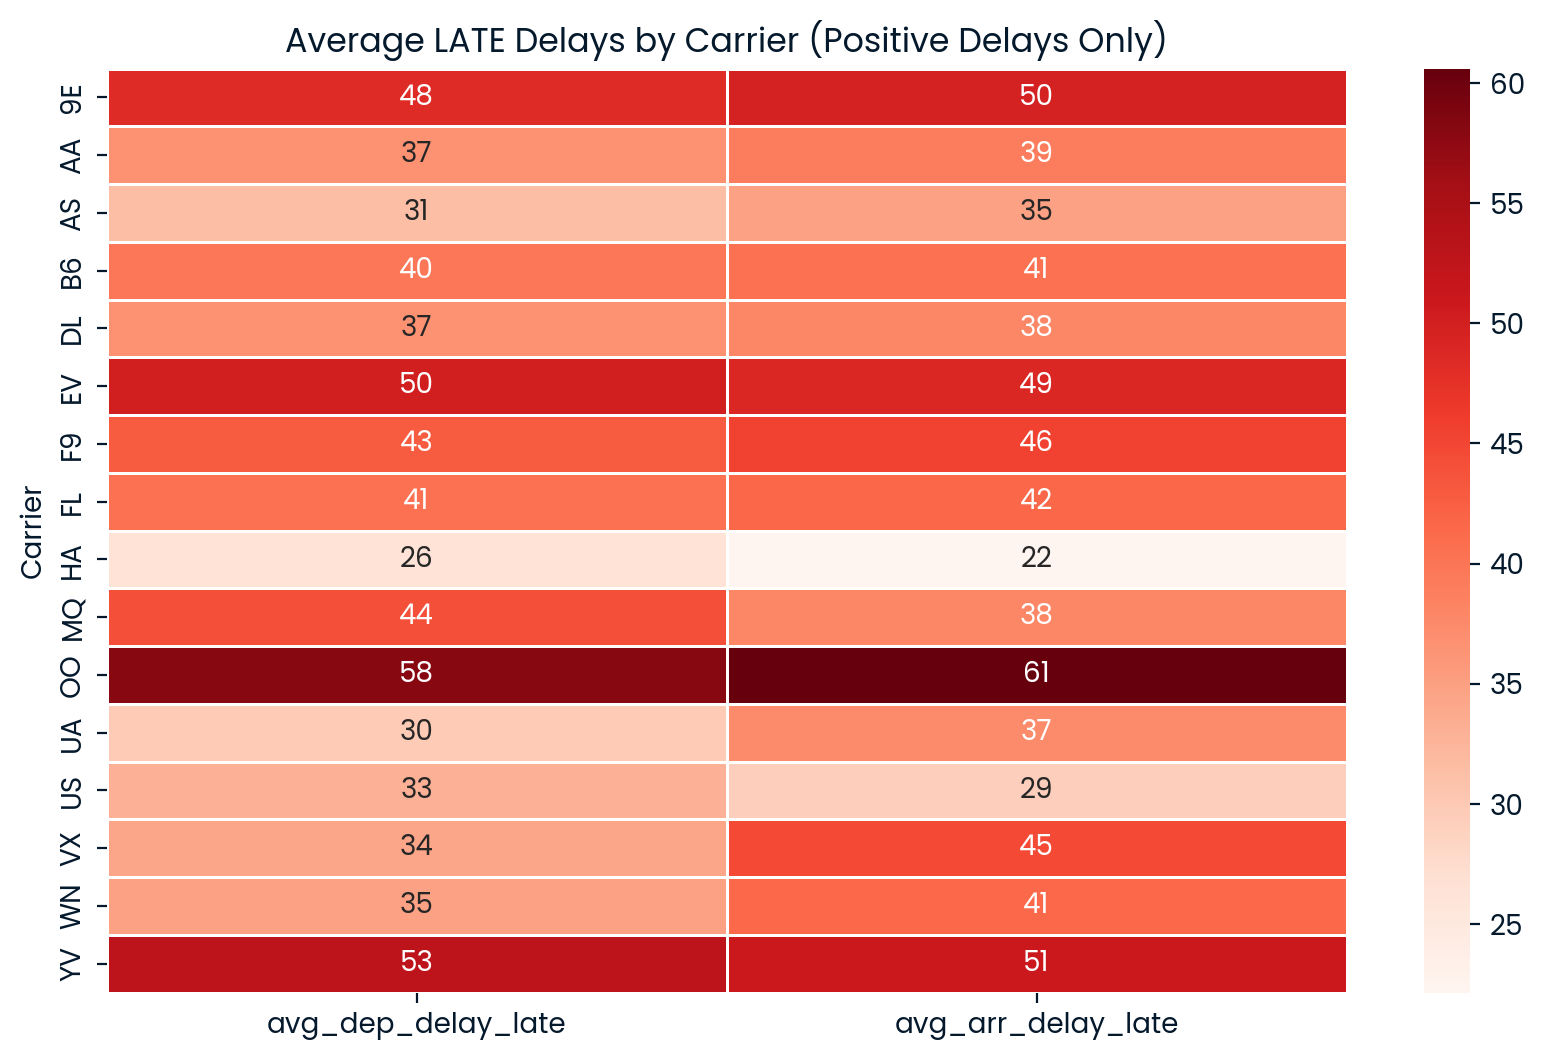

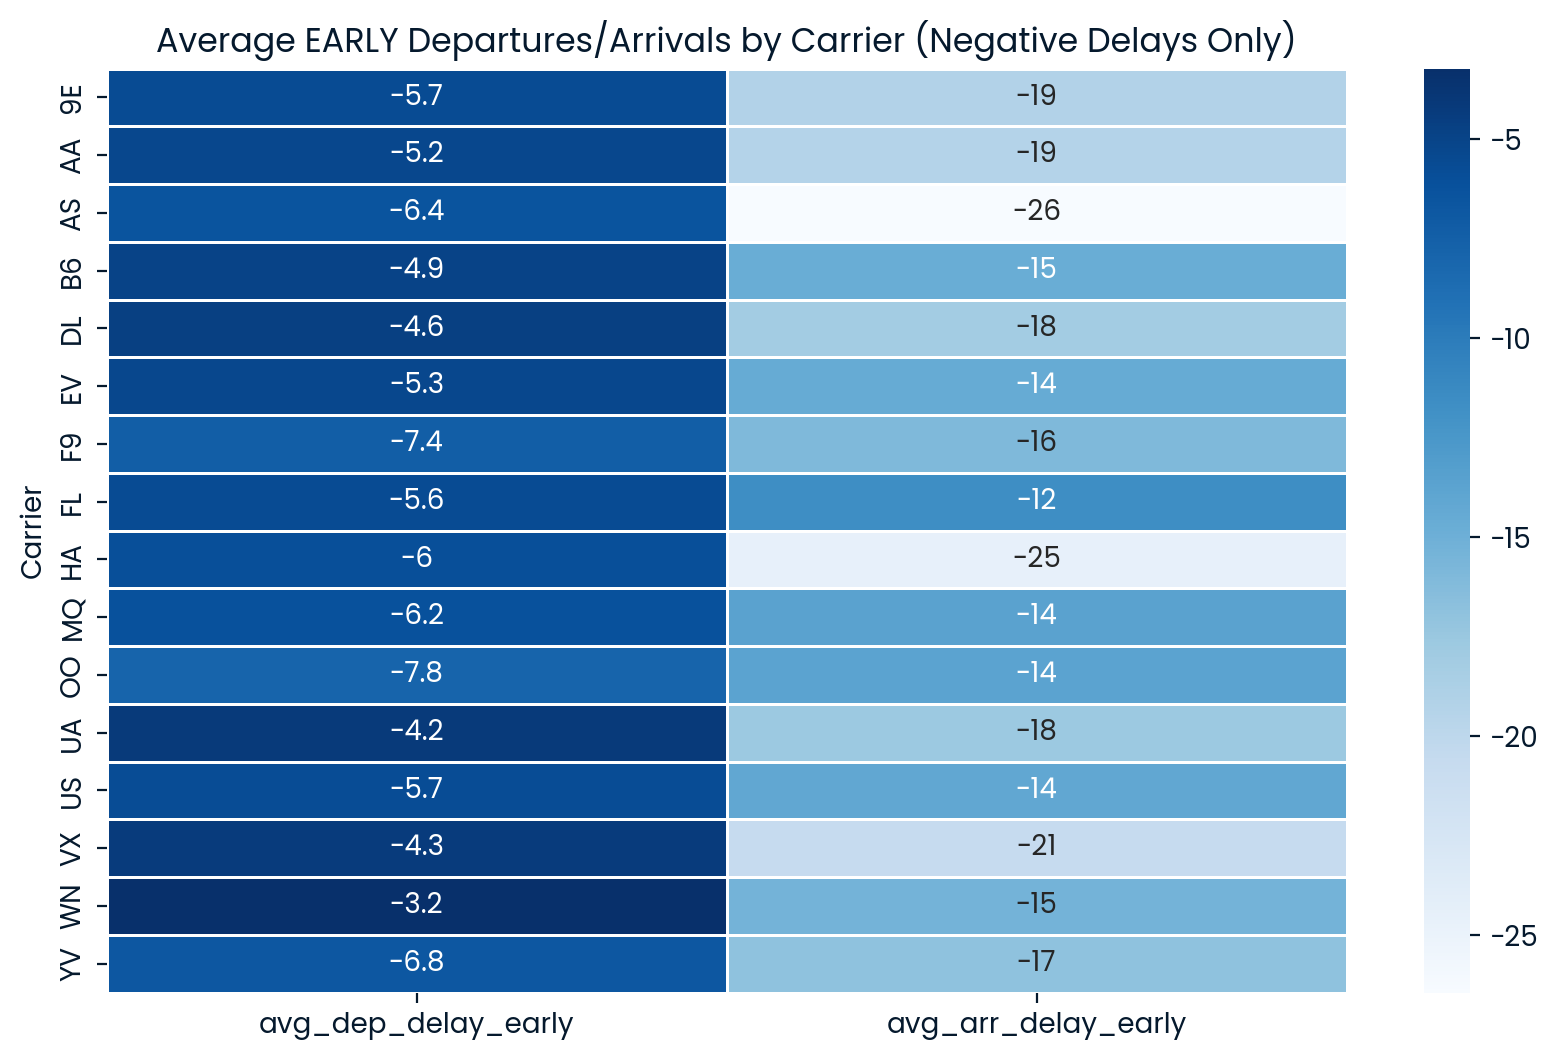

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the index to carrier so it appears on the Y-axis
carrier_summary_indexed = carrier_summary.copy()
carrier_summary_indexed.index.name = 'Carrier'

# Heatmap for LATE delays
late_delay_data = carrier_summary_indexed[['avg_dep_delay_late', 'avg_arr_delay_late']]

plt.figure(figsize=(10, 6))
sns.heatmap(late_delay_data, annot=True, cmap='Reds', linewidths=0.5)
plt.title("Average LATE Delays by Carrier (Positive Delays Only)")
plt.ylabel("Carrier")
plt.show()

# Heatmap for EARLY departures/arrivals (negative delays)
early_delay_data = carrier_summary_indexed[['avg_dep_delay_early', 'avg_arr_delay_early']]

plt.figure(figsize=(10, 6))
sns.heatmap(early_delay_data, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Average EARLY Departures/Arrivals by Carrier (Negative Delays Only)")
plt.ylabel("Carrier")
plt.show()


# Collecting Airports Coordinates for Map Visualize
(https://data.opendatasoft.com/explore/dataset/airports-code%40public/table/?refine.country_name=United+States)

In [23]:
airports_df = pd.read_excel('Cordinates/airports-code@public.xlsx')
airports_df

,Airport Code,Airport Name,City Name,Country Name,Country Code,Latitude,Longitude,World Area Code,City Name geo_name_id,Country Name geo_name_id,coordinates
0,CRS,Corsicana,Corsicana,United States,US,32.100000,-96.466667,67,4683462,6252001,"32.1, -96.466667"
1,VLD,Regional,Valdosta,United States,US,30.783333,-83.283333,67,4228147,6252001,"30.783333, -83.283333"
2,CIR,Cairo,Cairo,United States,US,4.666667,-76.016667,67,5111056,6252001,"4.666667, -76.016667"
3,CRP,Corpus Christi International Airport,"Corpus Christi, TX",United States,US,27.770278,-97.501111,67,4683416,6252001,"27.770278, -97.501111"
4,SIV,County,Sullivan,United States,US,39.100000,-87.400000,67,4980155,6252001,"39.1, -87.4"
...,...,...,...,...,...,...,...,...,...,...,...
2232,SOV,Seldovia,Seldovia,United States,US,59.450000,-151.700000,67,\N,6252001,"59.45, -151.7"
2233,DNL,Daniel Field,"Augusta, GA",United States,US,33.466389,-82.039444,67,5244365,6252001,"33.466389, -82.039444"
2234,KZB,Zachar Bay SPB,Zachar Bay,United States,US,57.550000,-153.750000,67,\N,6252001,"57.55, -153.75"
2235,HVS,Municipal,Hartsville,United States,US,34.400000,-80.116667,67,4628109,6252001,"34.4, -80.116667"


In [24]:
pip install pydeck

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 138.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Carrier UA Dep_Delay

In [25]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "UA") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_dep_delay=("dep_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("dep_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_dep_delay (mean absolute delays)
def total_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 82, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red

agg_delays["color"] = agg_delays["avg_total_dep_delay"].apply(total_delay_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Dep Delay (abs): " + agg_delays["avg_total_dep_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# Carrier UA Arr_Delay

In [26]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "UA") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_arr_delay=("arr_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_arr_delay (mean absolute delays)
def total_arr_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 82, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red

agg_delays["color"] = agg_delays["avg_total_arr_delay"].apply(total_arr_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay (abs): " + agg_delays["avg_total_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# Carrier US Dep_Delay

In [27]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "US") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_dep_delay=("dep_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("dep_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_dep_delay (mean absolute delays)
def total_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 75, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red
agg_delays["color"] = agg_delays["avg_total_dep_delay"].apply(total_delay_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Dep Delay (abs): " + agg_delays["avg_total_dep_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# Carrier US Arr_Delay

In [28]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "US") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_arr_delay=("arr_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_arr_delay (mean absolute delays)
def total_arr_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 82, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red

agg_delays["color"] = agg_delays["avg_total_arr_delay"].apply(total_arr_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay (abs): " + agg_delays["avg_total_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# Carrier HA Dep_Delay

In [29]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "HA") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_dep_delay=("dep_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("dep_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_dep_delay (mean absolute delays)
def total_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 75, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red
agg_delays["color"] = agg_delays["avg_total_dep_delay"].apply(total_delay_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Dep Delay (abs): " + agg_delays["avg_total_dep_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# Carrier HA Arr_Delay

In [30]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter UA flights from EWR, JFK, and LGA
ua_nyc = Filled_flight_data[
    (Filled_flight_data["status"] == "Safe") &
    (Filled_flight_data["carrier"] == "HA") &
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"]))
].copy()

# Aggregate: mean absolute departure delay by origin-destination
agg_delays = ua_nyc.groupby(["origin", "dest"]).agg(
    avg_total_arr_delay=("arr_delay", lambda x: abs(x).mean()),  # Mean absolute delay
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_total_arr_delay (mean absolute delays)
def total_arr_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay == 0:
        return [0, 255, 0]  # on-time = green
    elif delay <= 5:
        return [212, 255, 0] # light green
    elif delay <= 15:
        return [255, 215, 0]    # mild delay = yellow
    elif delay <= 20:
        return [255, 149, 0]    # moderate delay = orange
    elif delay <= 30:
        return [255, 82, 0]    # moderate delay = red orange
    else:
        return [255, 0, 0]      # severe delay = red

agg_delays["color"] = agg_delays["avg_total_arr_delay"].apply(total_arr_to_color)

# Add formatted tooltip text
agg_delays["tooltip_text"] = (
    "From " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay (abs): " + agg_delays["avg_total_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.6,
    pickable=True,
    auto_highlight=True
)

# View centered over NYC area
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Render with Carto basemap
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

deck.show()


# 1. How do different airlines compare in terms of their departure and arrival times? Are there noticeable trends in their on-time performance over the year?

Table and Visulize are providing a detailed comparison of airlines based on their departure and arrival times. We observe that airlines like **US** (United States) **HA** (Hawaiian Airlines), **AA** (American Airline) and **AS** (Alaska Airlines) exhibit exceptional on-time performance, with very low average delays and relatively few delayed flights. In contrast, carriers such as **EV** (ExpressJet), **MQ** (Envoy Air), and **F9** (Frontier Airlines) have both high average delays and a high number of delayed flights, indicating consistent reliability issues.

Larger carriers like **UA** (United Airlines) and **DL** (Delta Airlines) operate a high volume of flights, but Delta manages to maintain a significantly lower average delay, suggesting better operational efficiency. Meanwhile, **WN** (Southwest) and **B6** (JetBlue) also have frequent delays, despite moderate flight volumes.

Overall, the data highlights clear differences in performance across carriers. While some manage to run large operations with minimal delays, others struggle with both frequent and long delays. These patterns could be explored further over time to assess seasonal or monthly trends, which this table does not yet cover but would be a valuable next step

# *************************************************************

In [31]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate monthly averages (same as before)
monthly_delays = Filled_flight_data.groupby('month')[['dep_delay', 'arr_delay']].mean().reset_index()

# Create the figure
fig = go.Figure()

# Add departure delay line
fig.add_trace(go.Scatter(
    x=monthly_delays['month'],
    y=monthly_delays['dep_delay'],
    name='Departure Delay',
    mode='lines+markers',
    line=dict(color='blue', width=2),
    marker=dict(size=8)
))

# Add arrival delay line
fig.add_trace(go.Scatter(
    x=monthly_delays['month'],
    y=monthly_delays['arr_delay'],
    name='Arrival Delay',
    mode='lines+markers',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Average Delays by Month',
    xaxis_title='Month',
    yaxis_title='Average Delay (minutes)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=list(range(1, 13))
    ),
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig.show()


# Summer

In [32]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter flights from NYC airports (all carriers)
nyc_flights = Filled_flight_data[
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"])) &
    (Filled_flight_data['status'] == 'Safe') &
    (Filled_flight_data['season'] == 'summer')
].copy()


# Aggregate: mean arrival delay by origin-destination-carrier
agg_delays = nyc_flights.groupby(["origin", "dest", "carrier"]).agg(
    avg_arr_delay=("arr_delay", "mean"),
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_arr_delay
def avg_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay < 0:
        return [0, 0, 255]         # early = blue
    elif delay == 0:
        return [0, 255, 0]         # on-time = green
    elif delay <= 10:
        return [255, 215, 0]       # mild delay = yellow
    elif delay <= 30:
        return [255, 149, 0]       # moderate delay = orange
    else:
        return [255, 0, 0]         # severe delay = red

agg_delays["color"] = agg_delays["avg_arr_delay"].apply(avg_delay_to_color)

# Tooltip text
agg_delays["tooltip_text"] = (
    "Carrier: " + agg_delays["carrier"] +
    "\nFrom " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay: " + agg_delays["avg_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.4,
    pickable=True,
    auto_highlight=True
)

# View centered on NYC
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Deck rendering
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

# Show inline in notebook
deck.show()


# Winter

In [33]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter flights from NYC airports (all carriers)
nyc_flights = Filled_flight_data[
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"])) &
    (Filled_flight_data['status'] == 'Safe') &
    (Filled_flight_data['season'] == 'winter')
].copy()


# Aggregate: mean arrival delay by origin-destination-carrier
agg_delays = nyc_flights.groupby(["origin", "dest", "carrier"]).agg(
    avg_arr_delay=("arr_delay", "mean"),
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_arr_delay
def avg_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay < 0:
        return [0, 0, 255]         # early = blue
    elif delay == 0:
        return [0, 255, 0]         # on-time = green
    elif delay <= 10:
        return [255, 215, 0]       # mild delay = yellow
    elif delay <= 30:
        return [255, 149, 0]       # moderate delay = orange
    else:
        return [255, 0, 0]         # severe delay = red

agg_delays["color"] = agg_delays["avg_arr_delay"].apply(avg_delay_to_color)

# Tooltip text
agg_delays["tooltip_text"] = (
    "Carrier: " + agg_delays["carrier"] +
    "\nFrom " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay: " + agg_delays["avg_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.4,
    pickable=True,
    auto_highlight=True
)

# View centered on NYC
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Deck rendering
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

# Show inline in notebook
deck.show()


# Fall

In [34]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter flights from NYC airports (all carriers)
nyc_flights = Filled_flight_data[
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"])) &
    (Filled_flight_data['status'] == 'Safe') &
    (Filled_flight_data['season'] == 'fall')
].copy()


# Aggregate: mean arrival delay by origin-destination-carrier
agg_delays = nyc_flights.groupby(["origin", "dest", "carrier"]).agg(
    avg_arr_delay=("arr_delay", "mean"),
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_arr_delay
def avg_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay < 0:
        return [0, 0, 255]         # early = blue
    elif delay == 0:
        return [0, 255, 0]         # on-time = green
    elif delay <= 10:
        return [255, 215, 0]       # mild delay = yellow
    elif delay <= 30:
        return [255, 149, 0]       # moderate delay = orange
    else:
        return [255, 0, 0]         # severe delay = red

agg_delays["color"] = agg_delays["avg_arr_delay"].apply(avg_delay_to_color)

# Tooltip text
agg_delays["tooltip_text"] = (
    "Carrier: " + agg_delays["carrier"] +
    "\nFrom " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay: " + agg_delays["avg_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.4,
    pickable=True,
    auto_highlight=True
)

# View centered on NYC
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Deck rendering
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

# Show inline in notebook
deck.show()


# Spring

In [35]:
import pydeck as pdk
import pandas as pd

# Clean airport column names
airports_df = airports_df.rename(columns={
    "Airport Code": "code",
    "Latitude": "lat",
    "Longitude": "lon"
})

# Filter flights from NYC airports (all carriers)
nyc_flights = Filled_flight_data[
    (Filled_flight_data["origin"].isin(["EWR", "JFK", "LGA"])) &
    (Filled_flight_data['status'] == 'Safe') &
    (Filled_flight_data['season'] == 'spring')
].copy()


# Aggregate: mean arrival delay by origin-destination-carrier
agg_delays = nyc_flights.groupby(["origin", "dest", "carrier"]).agg(
    avg_arr_delay=("arr_delay", "mean"),
    flight_count=("arr_delay", "count")
).reset_index()

# Add origin coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="origin",
    right_on="code",
    how="left"
).rename(columns={"lat": "origin_lat", "lon": "origin_lon"}).drop(columns=["code"])

# Add destination coordinates
agg_delays = agg_delays.merge(
    airports_df[["code", "lat", "lon"]],
    left_on="dest",
    right_on="code",
    how="left"
).rename(columns={"lat": "dest_lat", "lon": "dest_lon"}).drop(columns=["code"])

# Color mapping for avg_arr_delay
def avg_delay_to_color(delay):
    if pd.isnull(delay):
        return [180, 180, 180]
    elif delay < 0:
        return [0, 0, 255]         # early = blue
    elif delay == 0:
        return [0, 255, 0]         # on-time = green
    elif delay <= 10:
        return [255, 215, 0]       # mild delay = yellow
    elif delay <= 30:
        return [255, 149, 0]       # moderate delay = orange
    else:
        return [255, 0, 0]         # severe delay = red

agg_delays["color"] = agg_delays["avg_arr_delay"].apply(avg_delay_to_color)

# Tooltip text
agg_delays["tooltip_text"] = (
    "Carrier: " + agg_delays["carrier"] +
    "\nFrom " + agg_delays["origin"] + " → " + agg_delays["dest"] +
    "\nAvg Arr Delay: " + agg_delays["avg_arr_delay"].round(2).astype(str) + " min" +
    "\nFlights: " + agg_delays["flight_count"].astype(str)
)

# Arc layer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=agg_delays,
    get_source_position=["origin_lon", "origin_lat"],
    get_target_position=["dest_lon", "dest_lat"],
    get_source_color="color",
    get_target_color="color",
    get_width=1.4,
    pickable=True,
    auto_highlight=True
)

# View centered on NYC
view_state = pdk.ViewState(latitude=40.7, longitude=-74.0, zoom=5, pitch=30)

# Deck rendering
deck = pdk.Deck(
    layers=[arc_layer],
    initial_view_state=view_state,
    map_provider="carto",
    map_style="https://basemaps.cartocdn.com/gl/voyager-gl-style/style.json",
    tooltip={"text": "{tooltip_text}"}
)

# Show inline in notebook
deck.show()


# 2. Are there particular months/weeks/time of day where there is a general trend of greater delays in flights across all carriers? If so, what could be the reasons?

Yes, there are clear trends showing greater delays in specific months and times of day.

From the scatter plot (or line plot) of average departure and arrival delays by month, we observe that with beginning of May average departure and arrival delays increases till June and July show notably higher delays. These months fall in the summer season, which is commonly associated with:

- Increased air traffic due to vacation and holiday travel
 
- Extreme weather conditions such as heat waves and thunderstorms
  
- Congestion in high-density airports, particularly in regions like New York City and Florida, which often experience backups

These factors combined result in longer delays across most carriers during the summer.

It also increases again in November through December during the New Year celebrations, causing congestion in the reservation schedules.

In [36]:
print(Filled_flight_data['origin'].unique())
print(Filled_flight_data['origin'].nunique())

['EWR' 'LGA' 'JFK']
3


In [37]:
airport_summary = Filled_flight_data.groupby('origin').agg(
    number_of_flights=('id', 'count'),

    num_late_dep=('dep_delay', lambda x: (x > 0).sum()),
    num_early_dep=('dep_delay', lambda x: (x < 0).sum()),
    avg_dep_delay_late=('dep_delay', lambda x: x[x > 0].mean()),
    avg_dep_delay_early=('dep_delay', lambda x: x[x < 0].mean()),
    
    num_late_arr=('arr_delay', lambda x: (x > 0).sum()),
    num_early_arr=('arr_delay', lambda x: (x < 0).sum()),
    avg_arr_delay_late=('arr_delay', lambda x: x[x > 0].mean()),
    avg_arr_delay_early=('arr_delay', lambda x: x[x < 0].mean()),

    avg_air_time=('air_time', 'mean')
)

# Round for clean output
airport_summary = airport_summary.round(2)

# Show the summary
airport_summary


,number_of_flights,num_late_dep,num_early_dep,avg_dep_delay_late,avg_dep_delay_early,num_late_arr,num_early_arr,avg_arr_delay_late,avg_arr_delay_early,avg_air_time
origin,,,,,,,,,,
EWR,117445,52590,59276,38.75,-4.76,50409,65120,42.46,-15.81,153.24
JFK,109284,41925,61125,37.62,-4.60,43076,64404,40.34,-17.36,178.13
LGA,101334,33577,63072,41.37,-5.66,40206,59439,39.44,-16.46,118.06


In [38]:
import pandas as pd
import plotly.express as px

# Group by carrier and calculate average early/late delays
airport_delay_stats = Filled_flight_data.groupby('origin').agg(
    avg_dep_delay_late=('dep_delay', lambda x: x[x > 0].mean()),
    avg_dep_delay_early=('dep_delay', lambda x: x[x < 0].mean()),
    avg_arr_delay_late=('arr_delay', lambda x: x[x > 0].mean()),
    avg_arr_delay_early=('arr_delay', lambda x: x[x < 0].mean())
).reset_index()

# --- Plot 1: Late Delays ---
late_delays = airport_delay_stats[['origin', 'avg_dep_delay_late', 'avg_arr_delay_late']]
late_delays_melted = late_delays.melt(id_vars='origin',
                                      var_name='Delay Type',
                                      value_name='Average Delay (minutes)')

fig_late = px.bar(late_delays_melted,
                  x='origin',
                  y='Average Delay (minutes)',
                  color='Delay Type',
                  barmode='group',
                  title='Average Late Delays by Airport (Positive Delays)',
                  labels={'Airport': 'Airline Carrier'})
fig_late.show()

# --- Plot 2: Early Delays ---
early_delays = airport_delay_stats[['origin', 'avg_dep_delay_early', 'avg_arr_delay_early']]
early_delays_melted = early_delays.melt(id_vars='origin',
                                        var_name='Delay Type',
                                        value_name='Average Delay (minutes)')

fig_early = px.bar(early_delays_melted,
                   x='origin',
                   y='Average Delay (minutes)',
                   color='Delay Type',
                   barmode='group',
                   title='Average Early Arrivals/Departures by Airport (Negative Delays)',
                   labels={'Airport': 'Airline Carrier'})
fig_early.show()


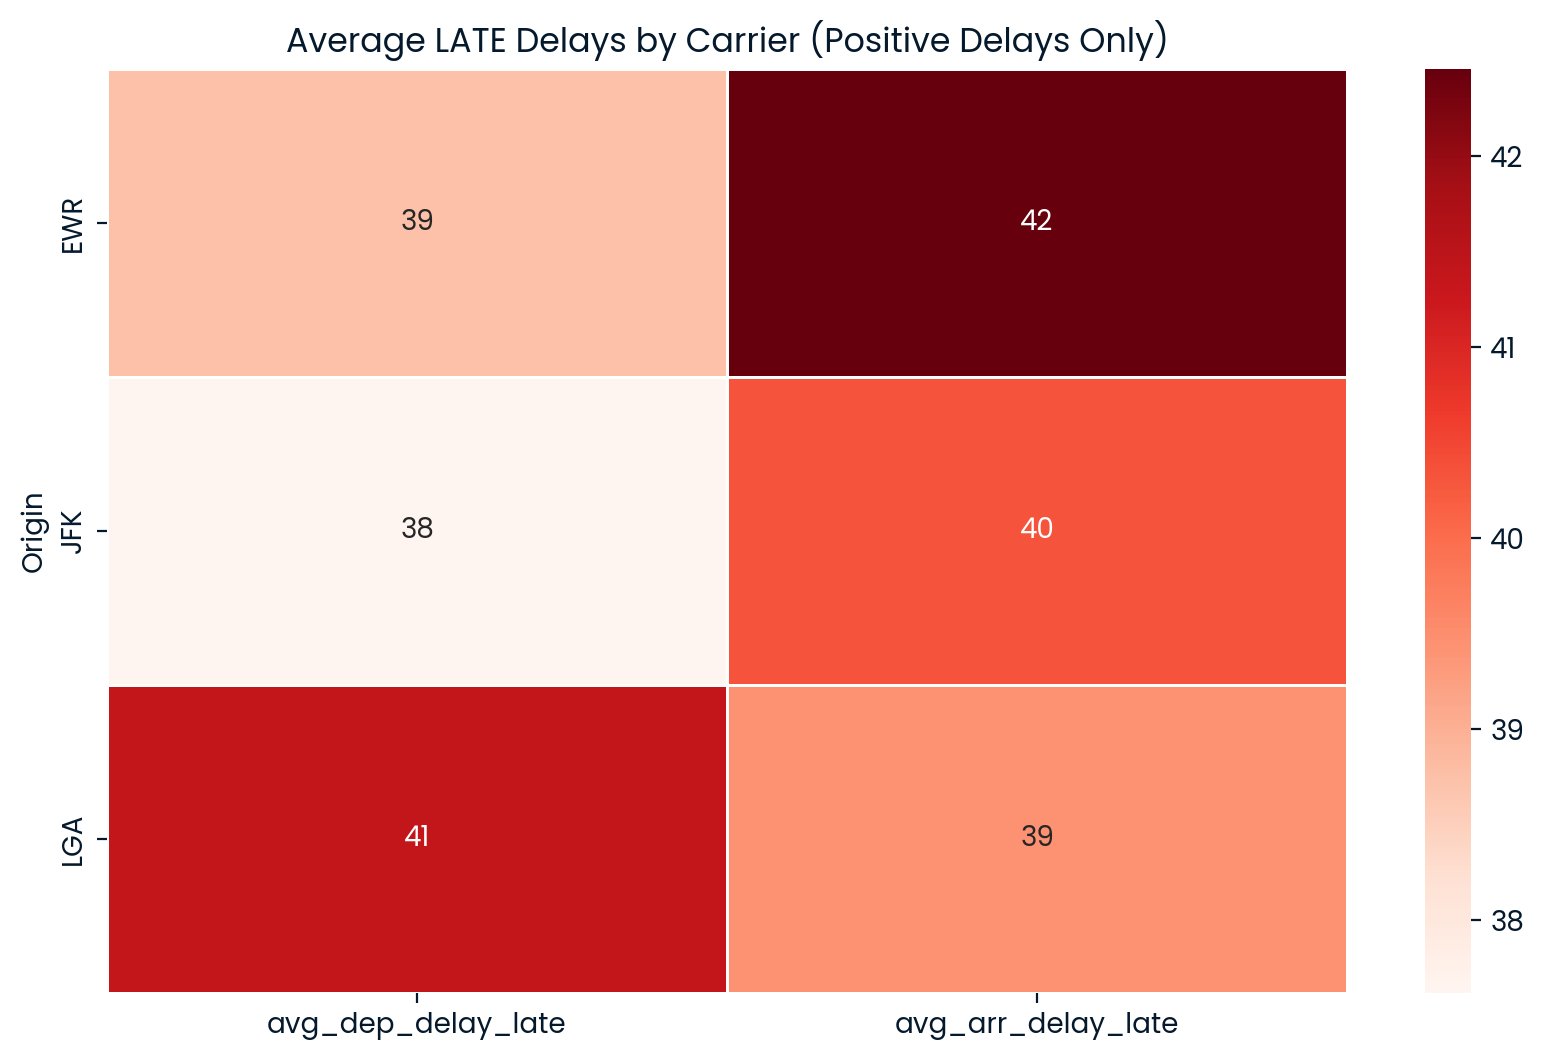

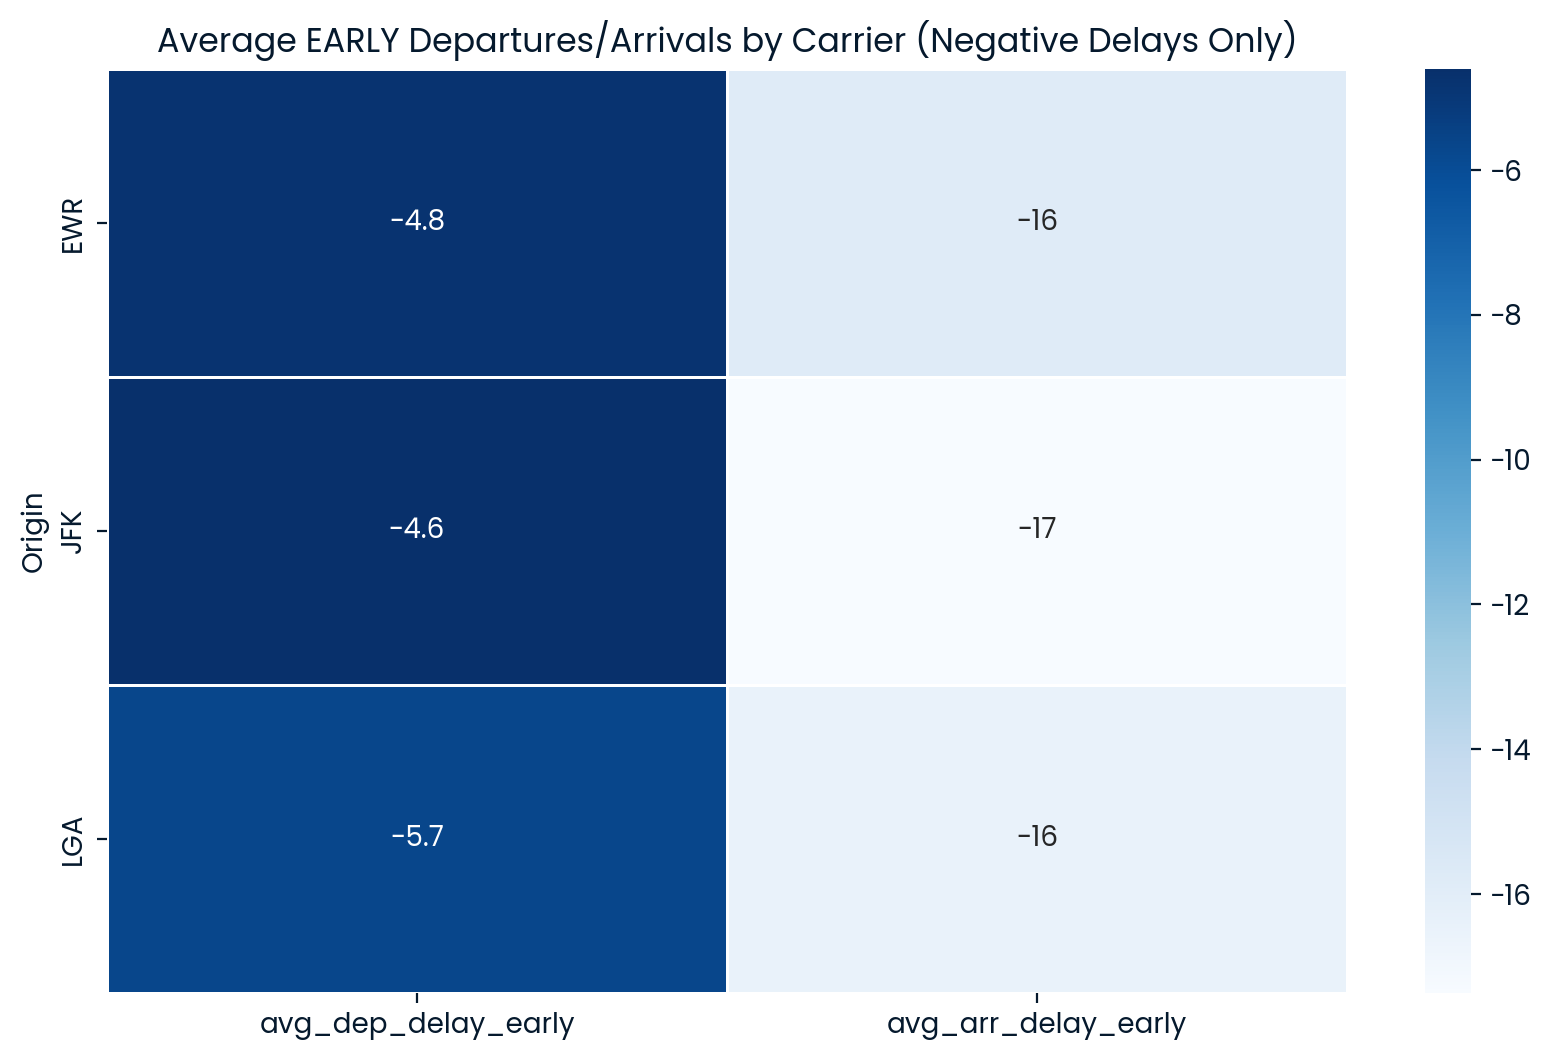

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the index to carrier so it appears on the Y-axis
airport_summary_indexed = airport_summary.copy()
airport_summary_indexed.index.name = 'origin'

# Heatmap for LATE delays
late_delay_data = airport_summary_indexed[['avg_dep_delay_late', 'avg_arr_delay_late']]

plt.figure(figsize=(10, 6))
sns.heatmap(late_delay_data, annot=True, cmap='Reds', linewidths=0.5)
plt.title("Average LATE Delays by Carrier (Positive Delays Only)")
plt.ylabel("Origin")
plt.show()

# Heatmap for EARLY departures/arrivals (negative delays)
early_delay_data = airport_summary_indexed[['avg_dep_delay_early', 'avg_arr_delay_early']]

plt.figure(figsize=(10, 6))
sns.heatmap(early_delay_data, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Average EARLY Departures/Arrivals by Carrier (Negative Delays Only)")
plt.ylabel("Origin")
plt.show()


# 3. Some airports seem to operate like clockwork, while others are notorious for disruptions. How do different airports compare when it comes to departure and arrival punctuality? Could location, traffic volume, or other factors play a role? Are there patterns that emerge when looking at delays across various airports? 

To evaluate how different airports compare in terms of departure and arrival punctuality, data was analyzed from three major origin airports: EWR (Newark), JFK (John F. Kennedy), and LGA (LaGuardia). The table summarizes key metrics including the total number of flights, frequency of late and early departures and arrivals, average delay times, and average air time.

The data shows that EWR handles the highest flight volume (117,445), followed by JFK (109,284) and LGA (101,334). EWR also records the highest number of late departures (52,590) and late arrivals (50,409), along with the highest average delays for both late departures (38.75 minutes) and late arrivals (42.46 minutes). This suggests that congestion due to high traffic volume may contribute significantly to flight delays at EWR.

In comparison, JFK and LGA demonstrate relatively better punctuality, with lower average delays and more early departures and arrivals. LGA stands out with the shortest average air time (118.06 minutes), which may offer a buffer to absorb minor delays and improve overall arrival performance.

These findings indicate that airport traffic volume and location play important roles in operational efficiency. Airports experiencing higher traffic levels are more prone to delays, pointing to the impact of airspace congestion and runway capacity constraints on scheduling reliability.


# **************************************************************************************

# **Flight Delay and Missing Data Analysis Report**
## **Overview**
This report presents a comprehensive analysis of flight delay patterns and the handling of missing data in a U.S. domestic flights dataset. Through a combination of exploratory data analysis, statistical modeling, and predictive machine learning techniques, we aim to:

- Investigate patterns in flight delays across airlines, airports, and timeframes
  
- Address and impute missing data, particularly for critical columns like air_time and arr_delay
  
- Understand structural reasons behind data inconsistencies (e.g., time zone effects)
  
- Provide actionable insights into operational performance of carriers and airports

## **Missing Data Analysis**
### **Extent and Nature of Missing Data**
Several columns contain missing values, with the largest gaps in arr_delay and air_time, each missing 9,430 entries. Upon inspection, we identified that:

- Some missing values can be inferred using related columns (dep_time, arr_time, and air_time)
  
- However, discrepancies in calculated and recorded durations highlighted the influence of time zones, taxi times, and gate delays

### **Flight Status Classification**
To contextualize missing values, we introduced a new column: status, classifying flights as:

- Safe: Complete and reliable data
  
- Cancelled: No departure or arrival data present
  
- Un-Reported: Departure time exists, but key arrival details are missing — potentially due to exceptional events

This classification helped isolate records where predictive imputation is viable and those where it is not.

## **Time Adjustment and Imputation Strategy**
Due to time zone-related inconsistencies, direct calculations of air_time (i.e., arr_time - dep_time) were unreliable. To resolve this:

- We collected time zone offset data for airports using web scraping from trusted sources (e.g., TravelMath)
  
- This allowed for normalization of flight durations across different local times

Prediction of Missing extra_time Values
To estimate missing values accurately:

### **Strategy 1: Machine Learning** (Used)
We used a Random Forest Regressor, which performed well due to its ability to handle non-linear dependencies and feature interactions. Features included:

- dep_delay
  
- month, day, season
  
- origin, dest
  
- carrier

### **Strategy 2: Descriptive Statistics** (ignored, but could work)
For less complex cases, descriptive methods were applied by grouping flights by:

- Month/season
  
- Route (origin to dest)
  
- Carrier

We imputed missing values using the mean or median of similar flight groups.

**Outcome**

After imputation:

- Most air_time gaps were resolved
  
- 8,713 rows remain missing due to 'Un-Reported' or 'Cancelled' status — these are not feasible to estimate and may remain NaN or be tagged with a default/error flag
  
## **Delay Analysis**
Airlines On-Time Performance
From our comparative analysis of airline carriers:

- Top Performers: Hawaiian Airlines (HA), Alaska (AS), and American Airlines (AA) show consistently low average delays
  
- Worst Performers: ExpressJet (EV), Envoy (MQ), and Frontier (F9) suffer from frequent and severe delays
  
- Delta (DL) stands out with excellent delay control despite a high flight volume
  
- Southwest (WN) and JetBlue (B6) experience moderate to high delays

This indicates that operational scale doesn’t necessarily compromise punctuality when efficiency is managed well.

## **Monthly and Time-of-Day Delay Patterns**
Clear delay trends emerged when analyzing data over time:

- Summer Peak: Delays rise notably in June and July, likely due to:

    - Vacation travel volume
      
    - Thunderstorms and extreme weather
      
    - Congested hubs like NYC and Florida

- Holiday Surge: A second spike occurs in November–December, corresponding to holiday traffic and New Year disruptions

## **Airport Performance**
Key Insight:

- EWR is the most congested, with the longest delays and highest flight volume

- JFK and LGA perform better, with LGA benefiting from shorter air times that help absorb delays

## **Visualizations and Mapping**
To further enhance our insights:

- Airport coordinates were sourced from Opendatasoft Airports Database
  
- Geospatial mapping of delay performance revealed regional trends and high-risk hubs
  
- These visual tools aid stakeholders in identifying bottlenecks and improving scheduling

## **Conclusion & Recommendations**
### **Key Takeaways**
- Machine learning models can effectively impute missing data when feature context is rich
  
- Delay trends vary significantly across carriers, airports, and seasons
  
- Time zone normalization is critical for accurate flight duration calculations

### **Recommendations**
1. Improve Data Logging: Airlines and airports should ensure consistent logging of time zone-adjusted times

2. Early Scheduling: Encouraging travelers to book morning flights may reduce exposure to delays

3. Targeted Investments: Airports like EWR could benefit from infrastructure upgrades to handle volume and reduce congestion

4. Carrier Benchmarking: Airlines with higher delays can study operational models of low-delay competitors like Delta or Alaska

